In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the training data set
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
#Checking the difference in training and testing datasets
diff_train_test = set(df_train.columns) - set(df_test.columns)
diff_train_test

{'SalePrice'}

In [4]:
# Check the column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

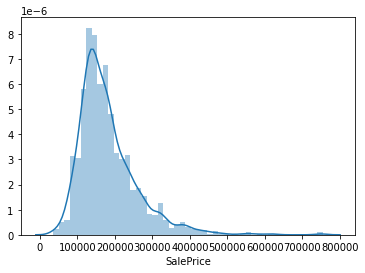

In [7]:
#histogram
sns.distplot(df_train['SalePrice']);

Deviate from the normal distribution. 
Have appreciable positive skewness.

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Relationship with numerical variables

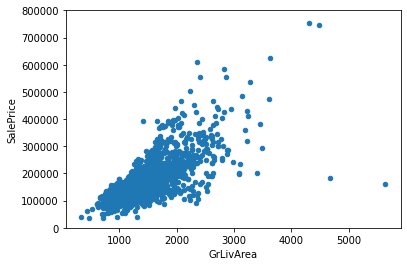

In [9]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

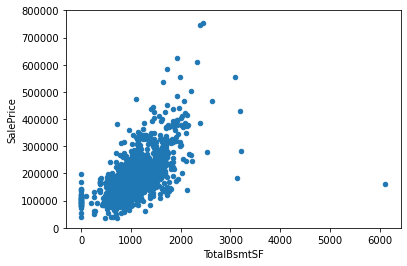

In [10]:
#scatter plot grlivarea/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Relationship with Categorical features

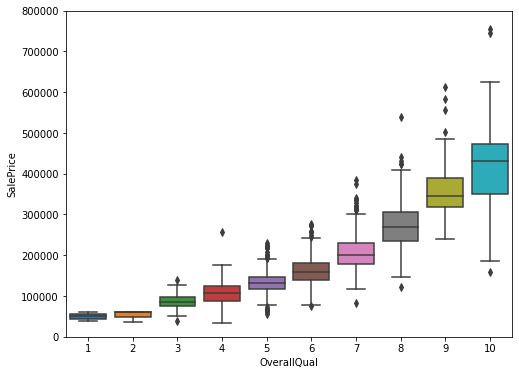

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

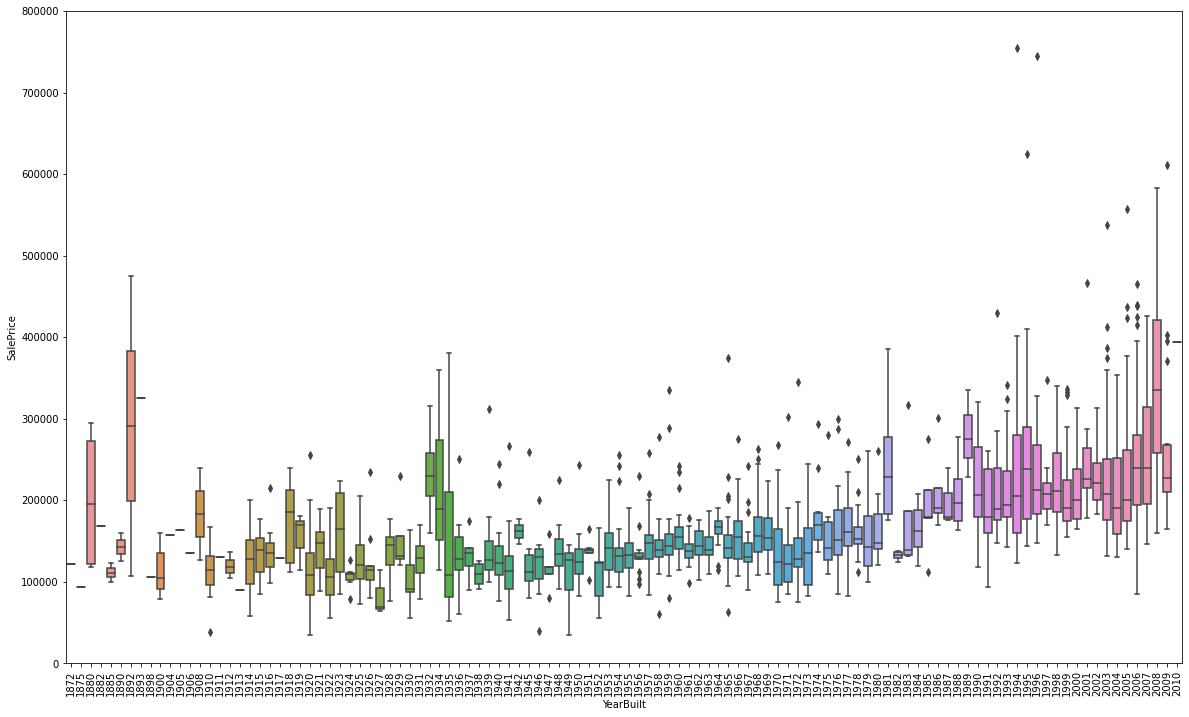

In [12]:
#box plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);plt.xticks(rotation=90);
plt.xticks(rotation=90);

# Correlation

Correlation matrix (heatmap style)

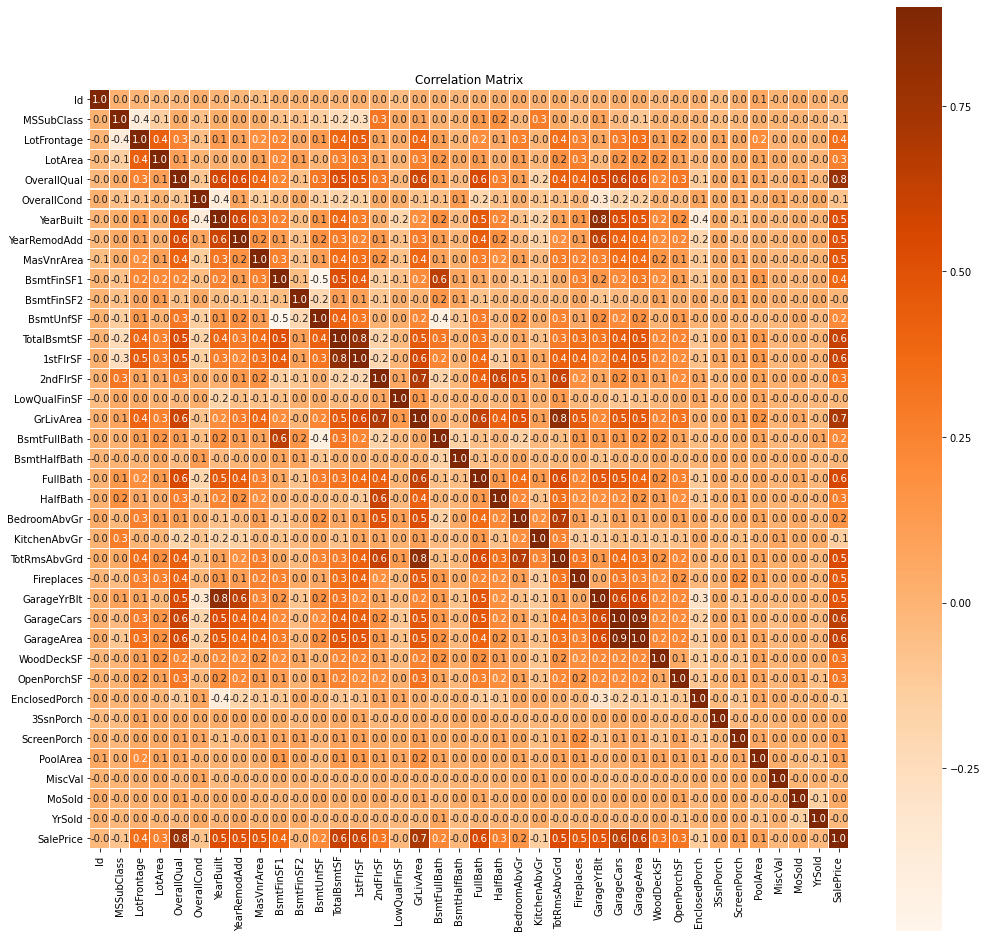

In [13]:
# this is a really important code section
# look at how we compute the correlation with df.corr() function and then feed it to sb.heatmap()
# play around by tweaking argument values
import seaborn as sb
corrmat = df_train.corr()
plt.subplots(figsize=(17,17))
plt.title("Correlation Matrix")
sb.heatmap(corrmat, vmax=0.9, square=True, cmap="Oranges", annot=True, fmt='.1f', linewidth='.1')

'SalePrice' correlation matrix (zoomed heatmap style)

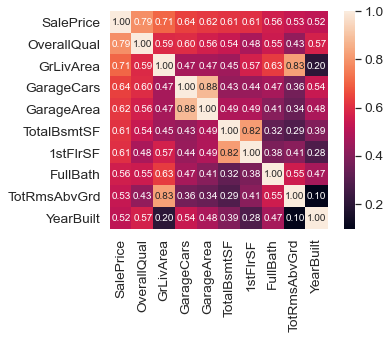

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

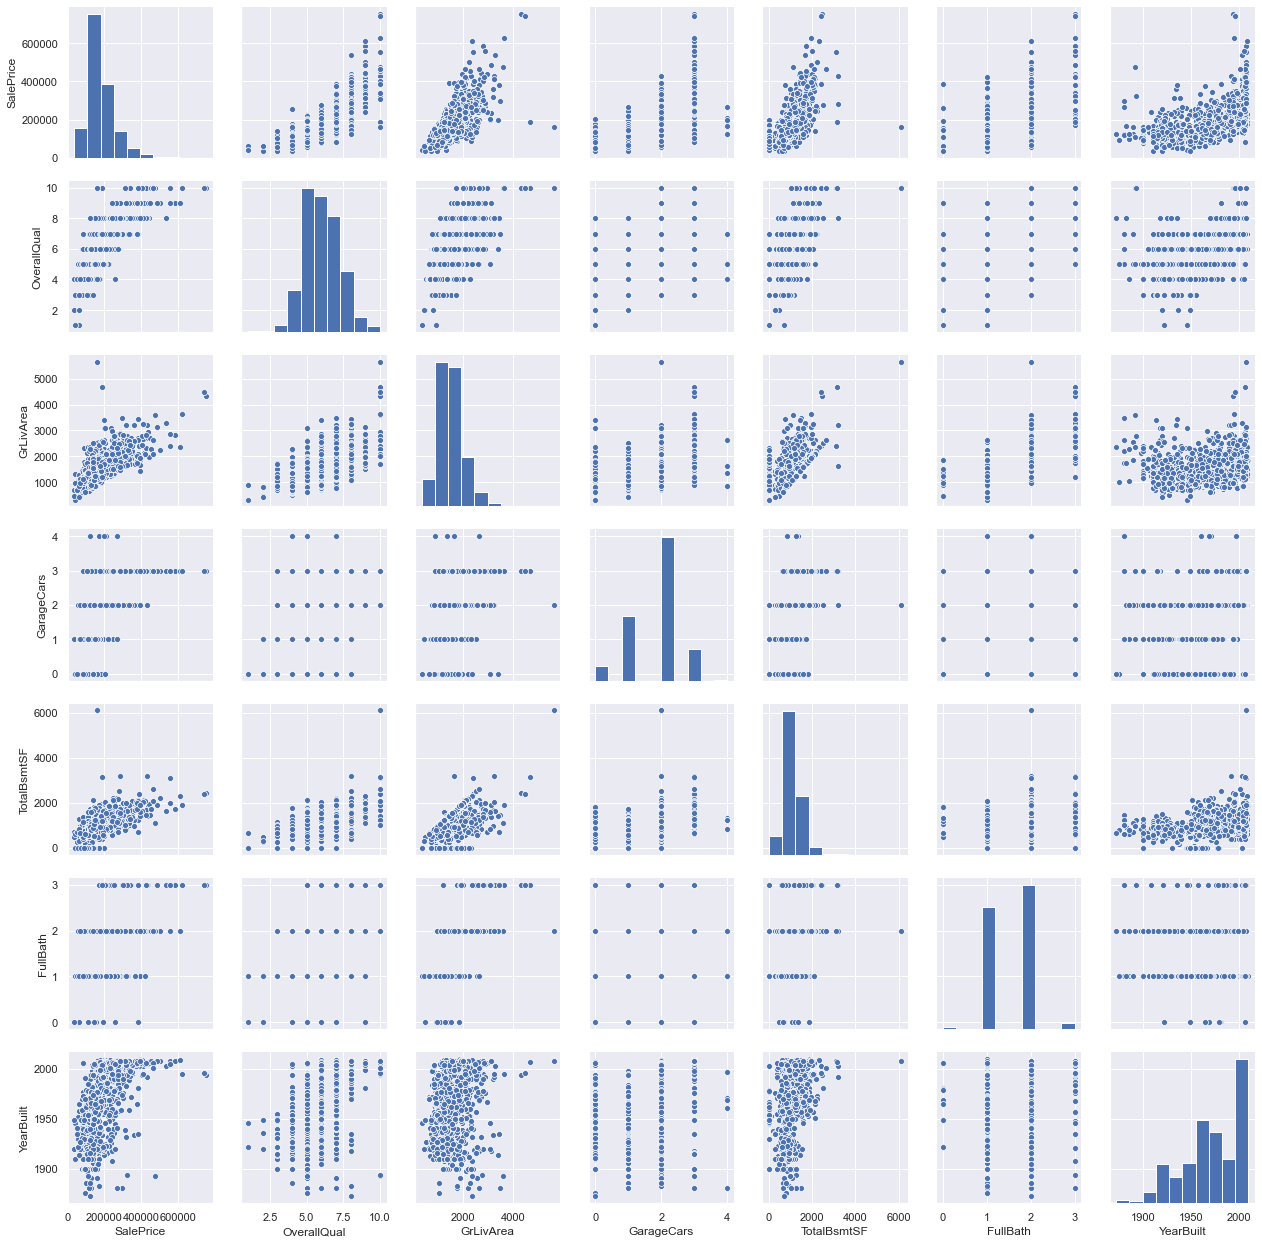

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

We may find out that they are the same things with two different names. Such as YearBuilt and GarageYrBuilt are same as the garage must have been built when the home was built.

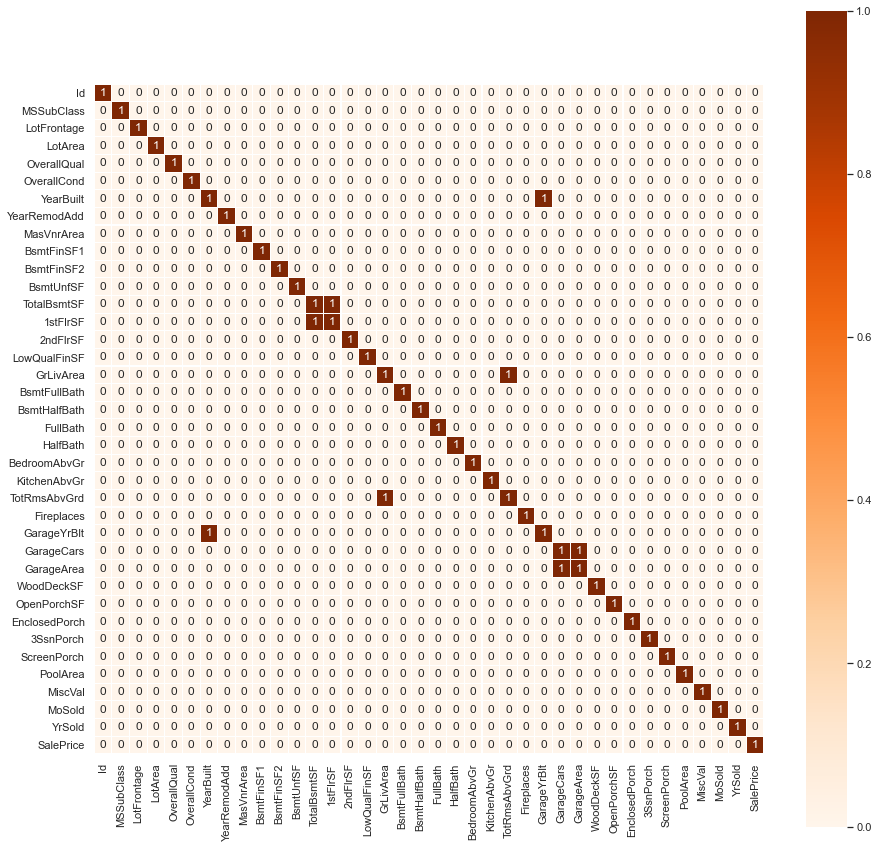

In [16]:
plt.subplots(figsize=(15, 15))
sb.heatmap(corrmat>0.8, annot=True, square=True, cmap="Oranges", linewidth='.1')

In [17]:
# Dropping unwanted features
df_train.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','1stFlrSF'],axis=1,inplace=True) 
df_test.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','1stFlrSF'],axis=1,inplace=True)

# Handle Missing data

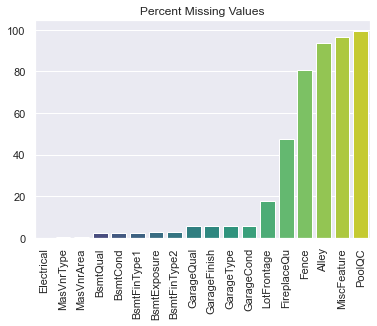

In [18]:
import seaborn as sb
percent = ((df_train.isnull().sum()/df_train.isnull().count()) * 100).sort_values(ascending=True)
percent = percent[percent>0]

plt.xticks(rotation=90); plt.title('Percent Missing Values')
sb.barplot(x=percent.index, y=percent, palette="viridis")

In [19]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [20]:
## Deleting PoolQC, MiscFeature and Alley - howver NA here does not represent missing value (they have their own significance) but they will not have much impact over the dataset since most of the columns are NA only
df_train = df_train.drop('PoolQC', 1);
df_train = df_train.drop('MiscFeature', 1);
df_train = df_train.drop('Alley', 1);

In [21]:
df_test = df_test.drop('PoolQC', 1);
df_test = df_test.drop('MiscFeature', 1);
df_test = df_test.drop('Alley', 1);

In [22]:
## Removing fence as well since NA will highly impact the dataset however NA has significance of it's own but if we replace it with some value then it can impact the data on its own
df_train = df_train.drop('Fence', 1);
df_test = df_test.drop('Fence', 1);

In [23]:
# Dropping GarageQual since GarageQual, GarageFinish and GarageCond all will signify one thing
df_train = df_train.drop('GarageQual', 1);
df_test = df_test.drop('GarageQual', 1);
df_train = df_train.drop('GarageFinish', 1);
df_test = df_test.drop('GarageFinish', 1);

In [24]:
# Dropping BsmtQual since both BsmtQual and BsmtCond will signify one thing
df_train = df_train.drop('BsmtQual', 1);
df_test = df_test.drop('BsmtQual', 1);

In [25]:
# Replacing NA with None
for df in [df_train, df_test]:
    for col in ('FireplaceQu', 'GarageCond', 'GarageType', 'BsmtFinType2', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtCond', 'MasVnrType'):
        df[col] = df[col].fillna('None')

In [26]:
# Removing record which contain missing value in Electrical feature
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [27]:
#Filling missing values of MasVnrArea and LotFrontage 
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)
df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(), inplace=True)
df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean(), inplace=True)

In [28]:
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Handling outliers

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [29]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


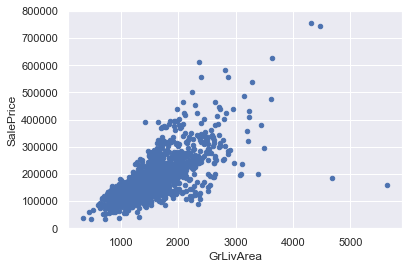

In [30]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [31]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


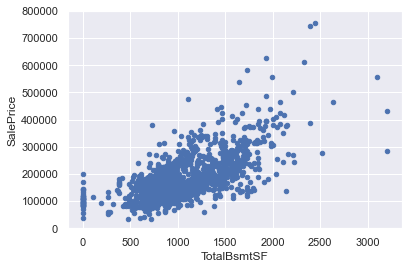

In [32]:
#bivariate analysis saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Testing for the assumptions 

## Normality 

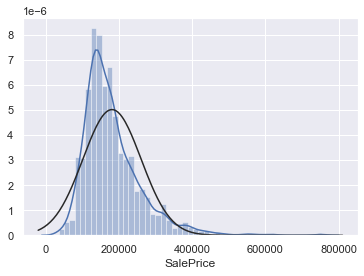

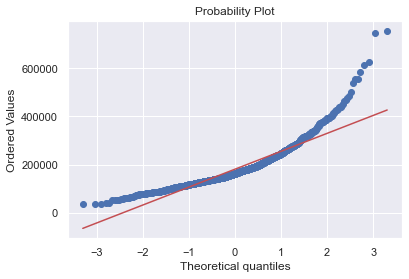

In [33]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [34]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

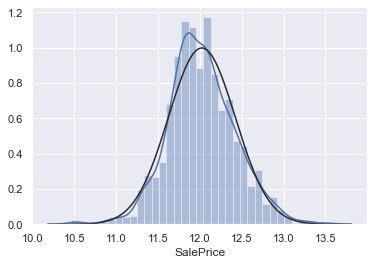

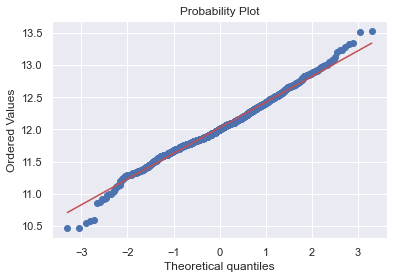

In [35]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

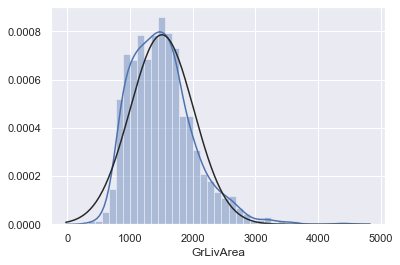

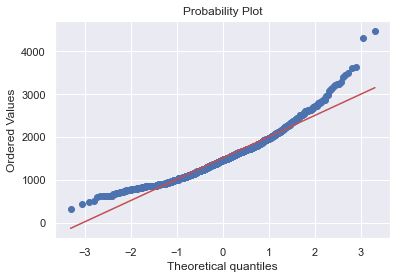

In [36]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [37]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

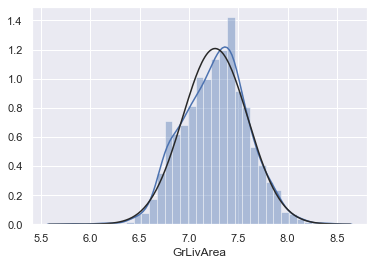

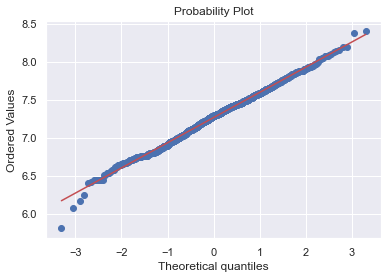

In [38]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

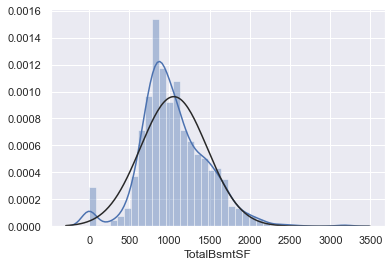

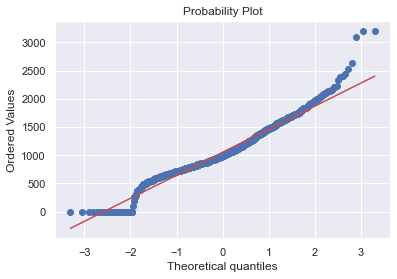

In [39]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [40]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [41]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

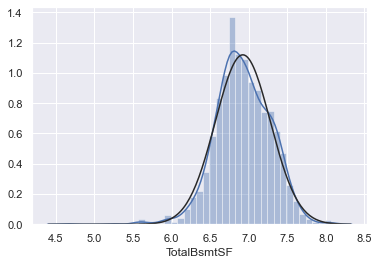

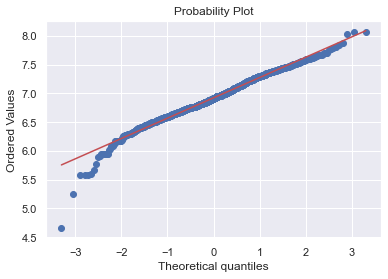

In [42]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Homoscedasticity 

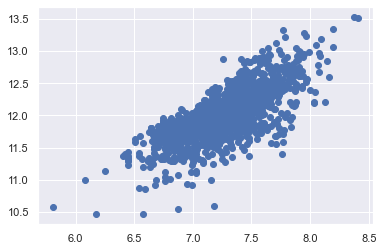

In [43]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

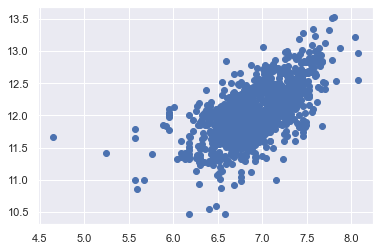

In [44]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 71 columns):
Id               1457 non-null int64
MSSubClass       1457 non-null int64
MSZoning         1457 non-null object
LotFrontage      1457 non-null float64
LotArea          1457 non-null int64
Street           1457 non-null object
LotShape         1457 non-null object
LandContour      1457 non-null object
Utilities        1457 non-null object
LotConfig        1457 non-null object
LandSlope        1457 non-null object
Neighborhood     1457 non-null object
Condition1       1457 non-null object
Condition2       1457 non-null object
BldgType         1457 non-null object
HouseStyle       1457 non-null object
OverallQual      1457 non-null int64
OverallCond      1457 non-null int64
YearBuilt        1457 non-null int64
YearRemodAdd     1457 non-null int64
RoofStyle        1457 non-null object
RoofMatl         1457 non-null object
Exterior1st      1457 non-null object
Exterior2nd      1457 non

In [46]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)

## OverallQual = OverallQual: Rates the overall material and finish of the house
df_train['OverallQual'] = df_train['OverallQual'].apply(str)
df_test['OverallQual'] = df_test['OverallQual'].apply(str)

#Dropping OverallCond since both overallcond and overallqual will signify same thing
df_train = df_train.drop('OverallCond', 1);
df_test = df_test.drop('OverallCond', 1);

#YearBuilt and YearRemodAdd - convertingfrom int to string
df_train['YearBuilt'] = df_train['YearBuilt'].apply(str)
df_test['YearRemodAdd'] = df_test['YearRemodAdd'].apply(str)

# BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr -- -- from int to cateogiral (str)
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].apply(str)
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].apply(str)
df_train['FullBath'] = df_train['FullBath'].apply(str)
df_train['HalfBath'] = df_train['HalfBath'].apply(str)
df_train['BedroomAbvGr'] = df_train['BedroomAbvGr'].apply(str)
df_train['KitchenAbvGr'] = df_train['KitchenAbvGr'].apply(str)

In [47]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].apply(str)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].apply(str)
df_test['FullBath'] = df_test['FullBath'].apply(str)
df_test['HalfBath'] = df_test['HalfBath'].apply(str)
df_test['BedroomAbvGr'] = df_test['BedroomAbvGr'].apply(str)
df_test['KitchenAbvGr'] = df_test['KitchenAbvGr'].apply(str)

# MoSold, YrSold, HasBsmt -- from int to cateogiral (str)
df_train['MoSold'] = df_train['MoSold'].apply(str)
df_train['YrSold'] = df_train['YrSold'].apply(str)
df_test['MoSold'] = df_test['MoSold'].apply(str)
df_test['YrSold'] = df_test['YrSold'].apply(str)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 70 columns):
Id               1457 non-null int64
MSSubClass       1457 non-null object
MSZoning         1457 non-null object
LotFrontage      1457 non-null float64
LotArea          1457 non-null int64
Street           1457 non-null object
LotShape         1457 non-null object
LandContour      1457 non-null object
Utilities        1457 non-null object
LotConfig        1457 non-null object
LandSlope        1457 non-null object
Neighborhood     1457 non-null object
Condition1       1457 non-null object
Condition2       1457 non-null object
BldgType         1457 non-null object
HouseStyle       1457 non-null object
OverallQual      1457 non-null object
YearBuilt        1457 non-null object
YearRemodAdd     1457 non-null int64
RoofStyle        1457 non-null object
RoofMatl         1457 non-null object
Exterior1st      1457 non-null object
Exterior2nd      1457 non-null object
MasVnrType       1457

## Dummy variables

In [49]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 436 entries, Id to SaleCondition_Partial
dtypes: float64(5), int64(18), uint8(413)
memory usage: 900.8 KB


# Linear Regression using N-fold cross validation

In [76]:
# build linear regression models by using N-fold cross evaluations ###################################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    

data_x = sm.add_constant(df_train.drop('SalePrice',1))
data_y = df_train['SalePrice']

In [77]:
m1=LinearRegression()
m1.fit(data_x, data_y)
print("\nBuild mdoels by LienarRegression()")
print("Intercept: ", m1.intercept_,"\nCoefficients:\n", m1.coef_,"\nR-square: ", m1.score(data_x, data_y))


Build mdoels by LienarRegression()
Intercept:  -40164078.52289951 
Coefficients:
 [ 1.46329859e+01 -1.44775947e-06  4.81357260e-04  3.55932715e-06
  1.91142185e-03  6.00923647e-06  3.37945586e-04  2.78012548e-04
  2.56954837e-04 -4.00861038e-02  2.24228178e-04  1.95305738e-04
  6.22328330e-02  2.79666788e-02  4.82983084e-02  1.21578548e-04
  1.51680555e-04  8.11002116e-05  1.74535822e-04  2.22993038e-04
  9.70405320e-05  1.48874585e-07 -2.51746175e+06  9.48580311e+05
  9.48580208e+05  9.48580333e+05  9.48580339e+05  9.48580378e+05
  9.48580303e+05  9.48580291e+05  9.48580251e+05  9.48580349e+05
  9.48580348e+05  9.48580367e+05  9.48580246e+05  9.48580319e+05
  9.48580374e+05 -4.11014235e+05 -4.79022903e+06 -4.79022854e+06
 -4.79022859e+06 -4.79022858e+06 -4.79022863e+06  3.38378192e+05
  3.38378284e+05  2.45959248e+06  2.45959250e+06  2.45959245e+06
  2.45959248e+06 -1.61427088e+05 -1.61427087e+05 -1.61427109e+05
 -1.61427092e+05  2.05647328e+05  2.05647163e+05  2.76125483e+06
  2.761

In [63]:
RMSE = np.sqrt(-cross_val_score(SMWrapper(sm.OLS), data_x, data_y, scoring="neg_mean_squared_error", cv = 10))
print("RMSE in 10 folds: ", RMSE)
print("RMSE = ", np.mean(RMSE))

RMSE in 10 folds:  [0.12900775 0.15145017 0.16106032 0.15520552 0.15767231 0.13254639
 0.13694118 0.12070164 0.14275192 0.14409416]
RMSE =  0.14314313547394902


In [81]:
# build linear regression models by using hold-out evaluations ###################################
# there are different ways: https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/
# unlike R, Python libraries do not provide feature selection for regression models
# but you can still find some self-implemented forward/backward selection codes online, if you need it

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

# using hold-out evaluation for example
x_train, x_test, y_train, y_test = train_test_split(df_train, df_train['SalePrice'], test_size=0.3)

print('train set:\n',x_train.shape, "\n", y_train.shape)
print('test set:\n',x_test.shape, "\n", y_test.shape)

# method 2: using the LinearRegression model
# drawback: you can get limited information about the model
m2=LinearRegression()
m2.fit(x_train, y_train)
print("\nBuild mdoels by LienarRegression()")
print("Intercept: ", m2.intercept_,"\nCoefficients:\n", m2.coef_,"\nR-square: ", m2.score(x_train, y_train))

# evaluate models by MAE or RMSE
y_predict=m2.predict(x_test)
MAE=metrics.mean_absolute_error(y_test, y_predict)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print("\nEvaluations on the test set: \nMAE: ", MAE,", RMSE: ", RMSE)

train set:
 (1019, 436) 
 (1019,)
test set:
 (438, 436) 
 (438,)

Build mdoels by LienarRegression()
Intercept:  3.370637102761975e-11 
Coefficients:
 [-5.10889506e-17  1.20888542e-16 -5.20417043e-18 -1.58298938e-15
 -2.93818789e-17 -1.19370659e-16  4.40538448e-16 -1.72062885e-16
  2.33252545e-14  7.69783542e-17 -6.23199409e-16 -1.05160930e-13
 -2.48132512e-14 -1.32935058e-13  2.28278767e-16 -4.45607093e-16
 -2.32019265e-16  1.82742276e-16 -1.21078278e-16  3.97468516e-16
  3.76489204e-17  1.00000000e+00 -3.75494118e-12 -7.18354481e-13
 -5.49574563e-13 -6.99750887e-13 -3.49355071e-13 -1.59107196e-13
 -1.39709969e-13 -6.47414792e-14 -2.03330064e-13 -8.95605396e-14
 -2.66512425e-13  1.74954629e-13  5.96307794e-13 -4.99041637e-14
 -3.04089349e-13 -2.19419430e-12  2.85485897e-12  2.68890506e-12
  2.53910240e-12  2.54909170e-12  2.79094952e-12 -5.17705776e-13
 -1.17849001e-12 -4.99457805e-13 -5.19159738e-13 -4.69266784e-13
 -4.60643380e-13 -1.07613199e-12 -1.12984361e-12 -1.14505986e-12
 -1.